# Rentabilidad campañas Showz

Realizaremos una evaluación de gastos en marketing de la empresa Showz para lograr determinar que tan rentables están siendo las campañas que se han implementado.


In [1]:
#LIBRERIAS
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
#IMPORTAR DATASETS
visitas = pd.read_csv('/datasets/visits_log_us.csv')
ventas = pd.read_csv('/datasets/orders_log_us.csv')
costos = pd.read_csv('/datasets/costs_us.csv')

##  1. Revisión de datos

In [3]:
visitas.info()
visitas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
ventas.info()
ventas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [5]:
costos.info()
costos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


### 1.5 Conversión de datos

In [6]:
# Convertir fechas en visits
visitas['Start Ts'] = pd.to_datetime(visitas['Start Ts'])
visitas['End Ts'] = pd.to_datetime(visitas['End Ts'])

# Convertir fechas en orders
ventas['Buy Ts'] = pd.to_datetime(ventas['Buy Ts'])

# Convertir fechas en costs
costos['dt'] = pd.to_datetime(costos['dt'])

### 1.6 Revisón de duplicados

In [7]:
# Verificar nulos
print("Nulos en 'visitas':\n", visitas.isna().sum(), '\n')
print("Nulos en 'ventas':\n", ventas.isna().sum(), '\n')
print("Nulos en 'costos':\n", costos.isna().sum(), '\n')

# Verificar duplicados
print("Duplicados en 'visitas':", visitas.duplicated().sum())
print("Duplicados en 'ventas':", ventas.duplicated().sum())
print("Duplicados en 'costos':", costos.duplicated().sum())

Nulos en 'visitas':
 Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64 

Nulos en 'ventas':
 Buy Ts     0
Revenue    0
Uid        0
dtype: int64 

Nulos en 'costos':
 source_id    0
dt           0
costs        0
dtype: int64 

Duplicados en 'visitas': 0
Duplicados en 'ventas': 0
Duplicados en 'costos': 0


## 2. Visitas


In [8]:
# Crear columna de fecha sin hora para facilitar agrupaciones
visitas['date'] = visitas['Start Ts'].dt.date
visitas['week'] = pd.to_datetime(visitas['date']).dt.week
visitas['month'] = pd.to_datetime(visitas['date']).dt.month

# Usuarios únicos por día
usuarios_diarios = visitas.groupby('date')['Uid'].nunique()

# Usuarios únicos por semana
usuarios_semanales = visitas.groupby('week')['Uid'].nunique()

# Usuarios únicos por mes
usuarios_mensuales= visitas.groupby('month')['Uid'].nunique()

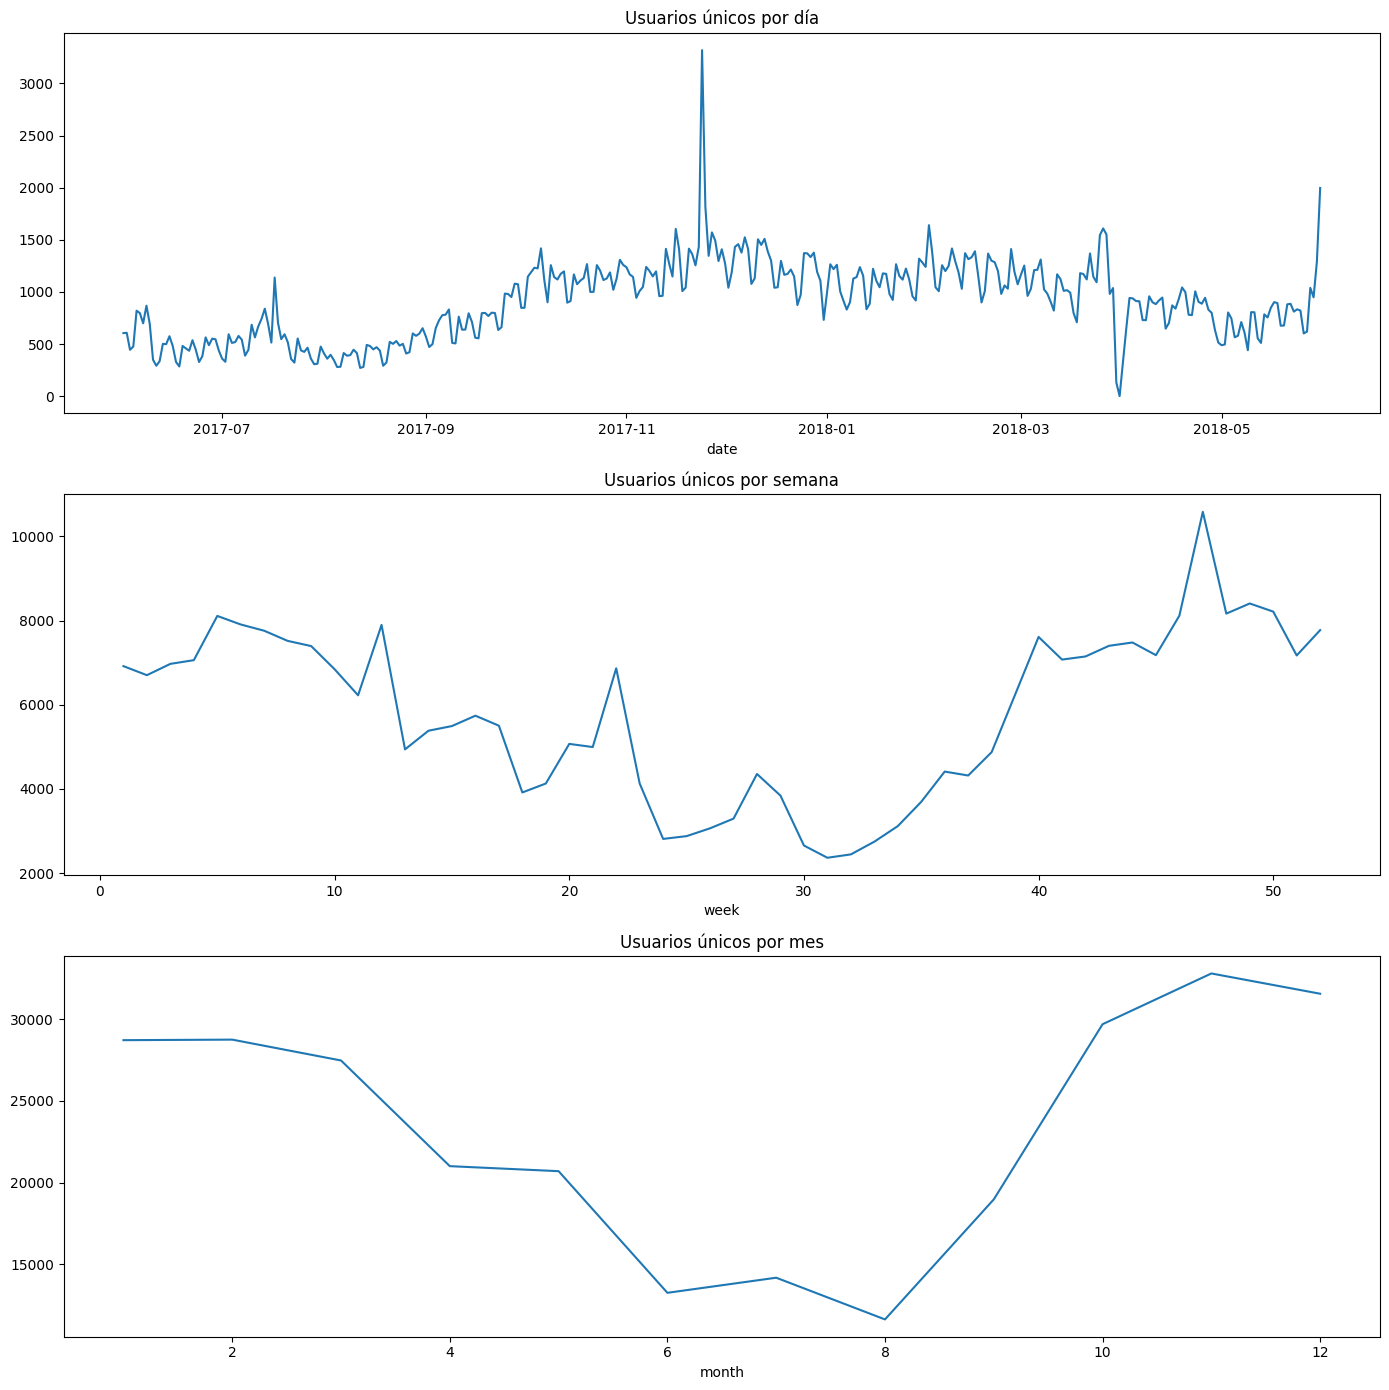

In [9]:
fig, ax = plt.subplots(3, 1, figsize=(14, 14))

usuarios_diarios.plot(ax=ax[0], title='Usuarios únicos por día')
usuarios_semanales.plot(ax=ax[1], title='Usuarios únicos por semana')
usuarios_mensuales.plot(ax=ax[2], title='Usuarios únicos por mes')

plt.tight_layout()
plt.show()

Observamos un comportamiento decreciente en el número de usuarios únicos entre los primeros meses del año y el 8vo mes, luego presentamos un gran crecimiento en este indicador alcanzando su máximo mensual en noviembre.

In [10]:
usuarios_diarios_promedio = visitas.groupby('date')['Uid'].count()
print(usuarios_diarios_promedio.mean())

987.3626373626373


En Promedio hay 987 usuarios diarios

In [11]:
usuarios_semanales_promedio = visitas.groupby('week')['Uid'].count()
print(usuarios_semanales_promedio.mean())

6911.538461538462


En Promedio hay 6912 usuarios semanales

In [12]:
usuarios_mensuales_promedio = visitas.groupby('month')['Uid'].count()
print(usuarios_mensuales_promedio.mean())

29950.0


En promedio hay 29950 usuarios mensuales

In [13]:
# Crear columna de duración de sesión
visitas['duracion_sesion'] = visitas['End Ts'] - visitas['Start Ts']

# Estadísticas básicas
visitas['duracion_sesion'].describe()

count                       359400
mean     0 days 00:10:43.025687256
std      0 days 00:16:37.127760516
min              -1 days +23:14:00
25%                0 days 00:02:00
50%                0 days 00:05:00
75%                0 days 00:14:00
max                0 days 11:51:00
Name: duracion_sesion, dtype: object

La duración promedio de la sesión es de 10:43 minutos

In [14]:
# Agrupar por usuario y ordenar por fecha
visitas_agrupadas = visitas.sort_values(by=['Uid', 'Start Ts'])

# Calcular la diferencia entre sesiones por usuario
visitas_agrupadas['days_between'] = visitas_agrupadas.groupby('Uid')['Start Ts'].diff().dt.days

# Promedio de días entre visitas
dias_promedio_entre_visitas = visitas_agrupadas['days_between'].mean()
print(f'Promedio de días entre visitas por usuario: {dias_promedio_entre_visitas:.2f}')

Promedio de días entre visitas por usuario: 27.68


## 3. Ventas

In [15]:
# Obtener primer acceso por usuario
primera_visita = visitas.groupby('Uid')['Start Ts'].min().reset_index()
primera_visita.columns = ['Uid', 'first_session']

# Obtener primera compra por usuario
primera_orden = ventas.groupby('Uid')['Buy Ts'].min().reset_index()
primera_orden.columns = ['Uid', 'first_order']

# Unir ambas tablas
conversion = primera_visita.merge(primera_orden, on='Uid', how='left')

# Calcular tiempo en días entre primera sesión y primera compra
conversion['conversion_lag'] = (conversion['first_order'] - conversion['first_session']).dt.days

# Crear categorías para días de conversión
conversion['conversion_category'] = pd.cut(
    conversion['conversion_lag'],
    bins=[-1, 0, 1, 3, 7, 14, 30, 90, 999],
    labels=['0d', '1d', '2-3d', '4-7d', '8-14d', '15-30d', '31-90d', '90+d']
)

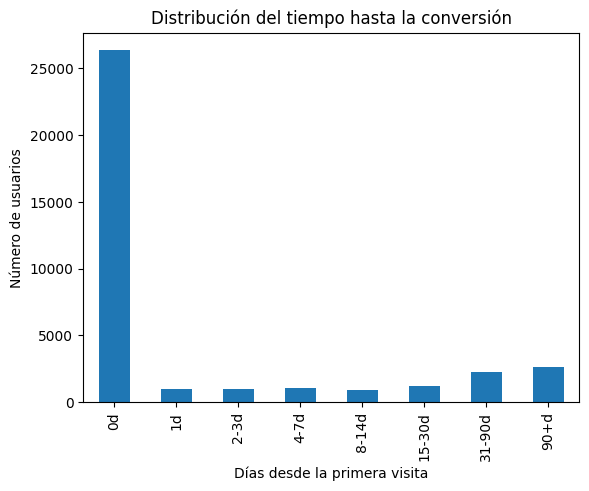

In [16]:
conversion['conversion_category'].value_counts().sort_index().plot(
    kind='bar',
    title='Distribución del tiempo hasta la conversión',
    xlabel='Días desde la primera visita',
    ylabel='Número de usuarios'
)
plt.show()

Podemos observar que la primera orden generalmente se realiza el mismo día de la primera visita

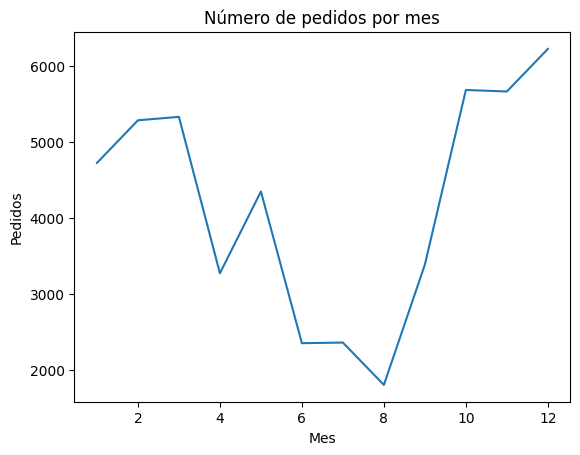

In [17]:
# Agregar columna de mes
ventas['month'] = pd.to_datetime(ventas['Buy Ts']).dt.month

# Número de pedidos por mes
ordenes_al_mes = ventas.groupby('month')['Uid'].count()

# Gráfico
ordenes_al_mes.plot(title='Número de pedidos por mes')
plt.ylabel('Pedidos')
plt.xlabel('Mes')
plt.show()

Viendo las ventas mensuales, podemos notar que el mes con menor ventas es agosto, mientras que las mayores ventas se realizan en diciembre

In [18]:
orden_promedio = ventas['Revenue'].mean()
print(f"Tamaño promedio de compra (AOV): ${orden_promedio:.2f}")

Tamaño promedio de compra (AOV): $5.00


In [19]:
# Ingreso total por usuario
ingreso_por_usuario = ventas.groupby('Uid')['Revenue'].sum()

# LTV 
ltv = ingreso_por_usuario.mean()
print(f"LTV promedio por cliente: ${ltv:.2f}")

LTV promedio por cliente: $6.90


## 4. Marketing

Gasto total en marketing: $329131.62
source_id
3     141321.63
4      61073.60
5      51757.10
2      42806.04
1      20833.27
10      5822.49
9       5517.49
Name: costs, dtype: float64


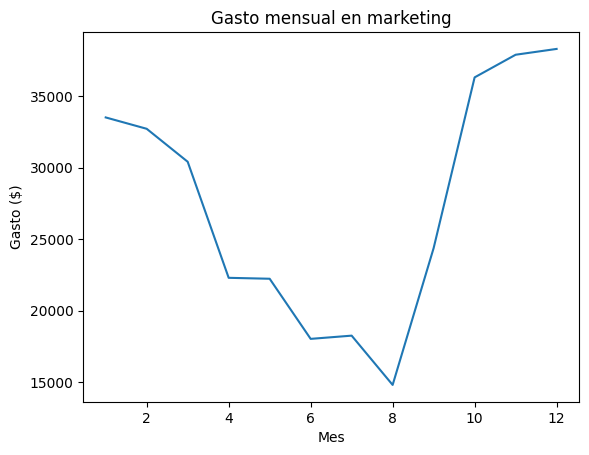

In [20]:
# Gasto total
costo_total = costos['costs'].sum()
print(f"Gasto total en marketing: ${costo_total:.2f}")

# Gasto por fuente
costo_fuente = costos.groupby('source_id')['costs'].sum().sort_values(ascending=False)
print(costo_fuente)

# Gasto mensual
costos['month'] = pd.to_datetime(costos['dt']).dt.month
costo_mes = costos.groupby('month')['costs'].sum()

# Gráfico
costo_mes.plot(title='Gasto mensual en marketing')
plt.ylabel('Gasto ($)')
plt.xlabel('Mes')
plt.show()

El gasto en marketing es mas bajo en agosto y presenta su maximo en diciembre.

In [21]:
# Obtener primera fuente para cada usuario
primera_fuente = visitas.groupby('Uid')['Source Id'].first().reset_index()
primera_fuente.columns = ['Uid', 'source_id']

# Usuarios que compraron
compradores = ventas['Uid'].unique()

# Usuarios adquiridos por fuente
fuentes_compras = primera_fuente[primera_fuente['Uid'].isin(compradores)]

# Clientes adquiridos por fuente
compradores_por_fuente = fuentes_compras.groupby('source_id')['Uid'].nunique()

# Total invertido por fuente
inversion_fuente = costos.groupby('source_id')['costs'].sum()

# CAC: inversión total / clientes adquiridos
cac = inversion_fuente / compradores_por_fuente
cac = cac.dropna().sort_values()

print("Costo de adquisición de clientes (CAC) por fuente:")
print(cac)

Costo de adquisición de clientes (CAC) por fuente:
source_id
9      3.899286
10     4.691773
1      5.565928
4      6.217408
5      7.567934
2      9.901929
3     15.465269
dtype: float64


En este caso la fuente 9 es la que es más rentable para atraer clientes mientras que fuentes como la 2 y la 3 presentan costos de adquisición de clientes muy elevados.

In [22]:
# Ingresos por fuente
ordenes_fuentes = ventas.merge(primera_fuente, on='Uid', how='left')
utilidad_fuentes = ordenes_fuentes.groupby('source_id')['Revenue'].sum()

# ROMI por fuente
romi = (utilidad_fuentes - inversion_fuente) / inversion_fuente
romi = romi.dropna().sort_values(ascending=False)

print("ROMI por fuente de adquisición:")
print(romi)

ROMI por fuente de adquisición:
source_id
1     0.850889
2     0.522034
9     0.282645
4    -0.140713
5    -0.220244
10   -0.293886
3    -0.686406
dtype: float64


Las fuentes 1,2 y 9 nos están dando rendimientos mientras que las fuentes 4,5,10 y 3 presentan perdidas por lo que se recomienda evaluar estos modelos para ver si deben ser modificados o cancelados dado sus resultados.

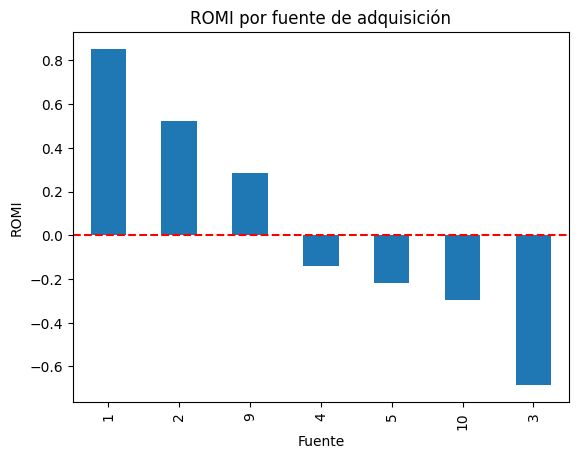

In [23]:
romi.plot(kind='bar', title='ROMI por fuente de adquisición')
plt.ylabel('ROMI')
plt.xlabel('Fuente')
plt.axhline(0, color='red', linestyle='--')
plt.show()

## Conclusión

1. Comportamiento de los usuarios:
La mayoría de los usuarios realizan su primera compra en los primeros días tras registrarse. La categoría "0d" (misma fecha de registro y compra) es la más común.

2. Ventas:
El tamaño promedio de compra es de aproximadamente $5.00

El LTV promedio por cliente es de aproximadamente $6.90, lo cual nos da una referencia clara del valor que podemos esperar por cliente.

El número de pedidos mensuales ha mostrado una tendencia fluctuante y muy relacionada a la epoca del año lo que nos da una idea de cuando se presentaran las mayores cantidades de pedidos

3. Marketing:
El gasto total en marketing en el período fue de $329131.62.

Al calcular el CAC (Costo de Adquisición de Clientes) por fuente, se observó que algunas fuentes tienen un costo muy elevado comparado con otras.

El ROMI permitió identificar qué fuentes de adquisición generaron ingresos por encima del gasto invertido.

Recomendaciones de inversión
Basado en el análisis de CAC y ROMI, se recomienda:

Aumentar la inversión en las fuentes con 1,2 y 9 ya que presentan un ROMI positivo, han demostrado ser rentables y sostenibles.

evaluar o cancelar la inversión en las fuentes 4, 5, 10 y 3 ya que estas nos están dando perdidas.



